# Capstone Project 1: New York City Taxi Fare Prediction

In big cities such as New York City, a huge number of taxi rides is taken per day. 
As the popularity of app-based vehicle hiring services grows, accurate prediction of taxi fare is essential for 
enhancing customers’ satisfaction, since it is given as upfront data to the customers. 
There are many factors that should be considered such as the pickup time, pickup or dropoff locations, etc. in predicting taxi fare. 
Providing accurate taxi fare at a specific time enables both drivers and customers to decide whether to select the rides or not. 
The goal of this project is developing a Machine Learning (ML) based model to predict the fare amount for a taxi ride in New York City while some data such as the pickup and dropoff locations are given. 

Predicting accurate taxi fares yields better results for taxi cab and ridesharing companies such as Uber, Lyft, etc. 
Also, this project can be used in traffic congestion prediction and autonomous vehicle research to develop accurate traffic models and choose the fastest and less congested routes. 

The data from a Kaggle competition is used for this project
(https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview).

The dataset for this project includes the features explained below:

   * pickup_datetime - timestamp value indicating when the taxi ride started.
    
   * pickup_longitude - float for longitude coordinate of where the taxi ride started.
    
   * pickup_latitude - float for latitude coordinate of where the taxi ride started.
    
   * dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
    
   * dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
    
   * passenger_count -integer indicating the number of passengers in the taxi ride.

During the modeling phase of the project, these features can be extended. 

Target: 

   * fare_amount - dollar amount of the cost of the taxi ride. 



In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from PIL import Image 
import matplotlib.image as mpimg
from scipy.stats import norm
from ipywidgets import interact
import ipywidgets as widgets

## Loading the Dataset

Read limited number of rows from dataset due to low memory. For this project, 6 million rows are read from 55 million available rows.

In [293]:
train_file = pd.read_csv('/Users/mehrnaz/Desktop/SpringBoard/Assignment/Capstone_Project_1/Data_wrangling/train.csv', nrows = 6000000)

## Part1: Data Wrangling

First try to see:
   * How train_file dataframe looks like. 
   * Shape of train_file. 
   * Statistics of the features

#### Let see how dataframe looks like

In [294]:
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


#### Check statistics of the features

In [295]:
train_file.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,6.000000e+06,6.000000e+06,6.000000e+06,5.999961e+06,5.999961e+06,6.000000e+06
mean,1.134049e+01,-7.251142e+01,3.992406e+01,-7.251060e+01,3.992049e+01,1.684645e+00
std,9.810989e+00,1.280236e+01,9.022813e+00,1.285400e+01,9.367604e+00,1.327794e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.344459e+03,3.457622e+03,3.345917e+03,2.080000e+02


#### Check data type of each column

In [296]:
train_file.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

#### Check the number of rows and columns of 'train_file' dataframe

In [297]:
train_file.shape

(6000000, 8)

## Performing Data Processing

Based on the above information, following steps should be performed:

* Check if there is any NAN and drop them

* Check the target column:

    * E.g. negative fare_amount does not make sense

In [298]:
#Check how manay NANs exsit in dataset
train_file.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    39
dropoff_latitude     39
passenger_count       0
dtype: int64

#### Remove NAN from the file 

In [299]:
train_file = train_file.dropna()

In [300]:
#Check the number of rows and columns after removing NAN
train_file.shape

(5999961, 8)

## Exploratory Data Analysis

Analyzing the data by performing data visualization, finding ouliers and driving new features.

### Fare Amount

Check if there is negative value for fare_amount. Then, remove rows with negative and zero values for 'fare_amount'.

In [301]:
Counter(train_file['fare_amount'] <= 0)

Counter({False: 5999539, True: 422})

In [302]:
train_file = train_file.drop(train_file[train_file['fare_amount'] <= 0].index, axis=0)

In [303]:
#Check the number of rows and columns after removing 'fare_amount' with negative value
train_file.shape

(5999539, 8)

#### Plot histogram for 'fare_amount'

<Figure size 720x576 with 0 Axes>

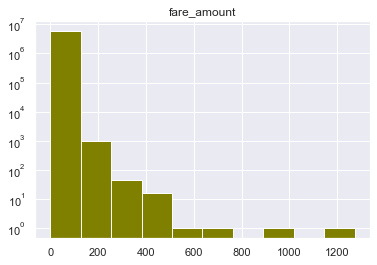

In [304]:
_ = plt.figure(figsize = [10,8])
_ = train_file.hist(column='fare_amount', color= 'olive', log=True)
_ = plt.savefig("figure.png") 

#### Remove 'fare_amount' outlier

Based on the histogram for 'fare_amount', the price range between (0,200) dollar makes sense.

Let see how many 'fare_amount' greater than 200 dollar exist.

In [305]:
Counter(train_file['fare_amount'] > 200)

Counter({False: 5999346, True: 193})

In [306]:
#Does not make sense to have 'fare_amount' greater than $200, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['fare_amount'] > 200].index, axis=0)
train_file.shape

(5999346, 8)

### Passnger Count

The other column that should be cleaned up is the 'passenger_count'.

Let's find if there is an outlier for this feature.

<Figure size 720x576 with 0 Axes>

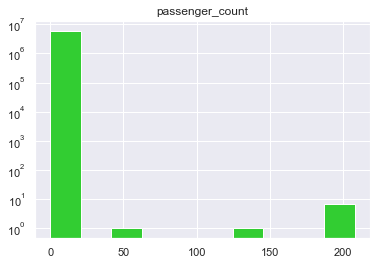

In [307]:
_ = plt.figure(figsize = [10,8])
_ = train_file.hist(column='passenger_count', color='limegreen', log=True)
_ = plt.savefig("fig_passenger.png")

In [308]:
#Check if there is outlier for passenger_count
train_file['passenger_count'].max()

208

The histogram of passenger_count shows passenger_count distribution. Maximum number of passengers is 208 that is not realistic for the number of seats on a taxi cab. The maximum allowed passengers for an SUV or a Van is 6. So, 6 is considered as an upper bound for the number of passengers in each ride.

In [309]:
#Does not make sense to have 'passenger_count' greater than 6 or less than 1, so consider them as bounds and remove the data out of bounds.
train_file = train_file[train_file['passenger_count'].between(1, 6)]
train_file.shape

(5978161, 8)

### Latitude and Longitude

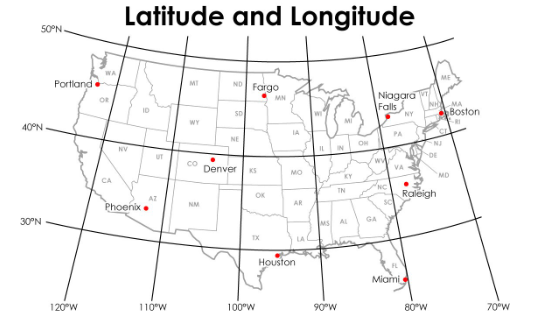

In [310]:
filename = '/Users/mehrnaz/Desktop/SpringBoard/Assignment/Capstone_Project_1/Statistical_Method/us_lat_long.png'
Image.open(filename)

In order to analyze latitude and longitude columns, coordinates of NYC should be considered as boundaries.

Googled to find the latitude and longtitude range for NYC:
* The NYC's latitude is in the range of (40, 42) 

* The NYC longtitude is in the range of (-76, -71) 

I have considered a slightly wider range for latitude and longtitude to be more inclusive.

In [311]:
#check to see if there is an outlier for pickup_longitude
train_file['pickup_longitude'].max()

3439.425565

In [312]:
#check to see if there is an outlier for pickup_latitude
train_file['pickup_latitude'].max()

3344.459268

In [313]:
#check to see if there is an outlier for pickup_longitude
train_file['pickup_longitude'].min()

-3426.60895

In [314]:
#check to see if there is an outlier for pickup_latitude
train_file['pickup_latitude'].min()

-3488.079513

In [315]:
#check to see if there is an outlier for dropoff_longitude
train_file['dropoff_longitude'].max()

3457.62235

In [316]:
#check to see if there is an outlier for dropoff_longitude
train_file['dropoff_longitude'].min()

-3412.6530869999997

In [317]:
#check to see if there is an outlier for dropoff_latitude
train_file['dropoff_latitude'].max()

3345.9173530000003

In [318]:
#check to see if there is an outlier for dropoff_latitude
train_file['dropoff_latitude'].min()

-3488.079513

In [319]:
#'pickup_latitude' should be in the range of (40, 42)
train_file = train_file[train_file['pickup_latitude'].between(40, 42)]
train_file.shape

(5860283, 8)

In [320]:
#'pickup_longitude' should be in the range of (-76, -71)
train_file = train_file[train_file['pickup_longitude'].between(-76,-71)]
train_file.shape

(5859282, 8)

In [321]:
#'dropoff_latitude' should be in the range of (40, 42)
train_file = train_file[train_file['dropoff_latitude'].between(40, 42)]
train_file.shape

(5853740, 8)

In [322]:
#'dropoff_longitude' should be in the range of (-76, -71)
train_file = train_file[train_file['dropoff_longitude'].between(-76,-71)]
train_file.shape

(5853045, 8)

## Driving Features from Data

In the next step, new features will be created based on the available data to see whether these features affect the fare_amount or not.
    * Distance between pickup and dropoff location should be calculated.
    * The date and time of pickup. 
    

### Distance Between Pickup and Dropoff Locations

Haversine formula is employed to calculate the distance between pickup and dropoff locations based on longitude and latitude. 

The Haversine formula is (https://en.wikipedia.org/wiki/Haversine_formula):

distance = 2 * r * arcsin(sqrt(sin((latitude2 - latitude1) / 2.0)^2 + cos(latitude1) * cos(latitude2) * sin((longitude2 - longitude1) / 2.0)^2))
    

In [323]:
#Calculate the distance based on Haversine formula
def distance(lat1, lat2, lon1, lon2):
    # radians which converts from degrees to radians.   
    lat1 = np.radians(lat1) 
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1) 
    lon2 = np.radians(lon2) 
        
    # Haversine formulation  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
       
    # calculate the result 
    dis = c * r
    return dis

def creat_new_cloumn(df):
    data = [df]
    for row in data:
        row['distance'] = distance(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude'])
    return row['distance'] 
creat_new_cloumn(train_file)

0           1.030764
1           8.450134
2           1.389525
3           2.799270
4           1.999157
             ...    
5999995     1.754230
5999996     1.170740
5999997    10.236437
5999998     3.871053
5999999     1.327775
Name: distance, Length: 5853045, dtype: float64

In [324]:
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [325]:
train_file.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
dtype: object

In [326]:
#Check if there are ouliers for distance
train_file['distance'].max()

237.35211613786055

In [327]:
#Check if there are ouliers for distance
train_file['distance'].min()

0.0

<Figure size 720x576 with 0 Axes>

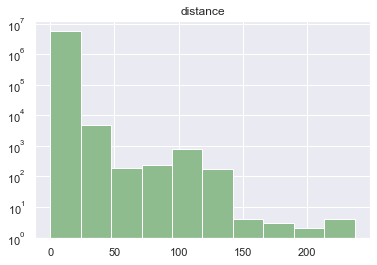

In [328]:
_ = plt.figure(figsize = [10,8])
_ = train_file.hist(column='distance', color='darkseagreen', log=True)

In [329]:
#Does not make sense to have 'distance' greater than 150km, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['distance'] > 150].index, axis=0)
train_file.shape

(5853033, 9)

In [330]:
# Zero 'distance' does not make sense, so consider them as outlier and remove them
train_file = train_file.drop(train_file[train_file['distance'] == 0].index, axis=0)
train_file.shape

(5790599, 9)

Fare_amount usually changes based on the days of the week. To explore how price change and affect the 'fare_amount', the type of the key column should be converted to datetime type to create new year, month, day, dayofweek, and hour columns. Since the 'key' and 'pickup_datetime' columns are the same, the 'key' column should be removed to get rid of duplicated data.

In [331]:
#convert the 'key' column to datetime 
train_file['key'] = pd.to_datetime(train_file['key'])
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [332]:
train_file.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
distance                    float64
dtype: object

### Extract Time and Date features

Date and time features can be extracted from 'pickup_datetime' column.

#### Add 'year' column to dataframe

In [333]:
train_file['year'] = train_file['key'].dt.year

#### Add 'month' column to dataframe

In [334]:
train_file['month'] = train_file['key'].dt.month

#### Add 'dayofweek' column to dataframe

In [335]:
train_file['dayofweek'] = train_file['key'].dt.dayofweek

#### Add 'day' column to dataframe

In [336]:
train_file['day'] = train_file['key'].dt.day

#### Add 'hour' column to dataframe

In [337]:
train_file['hour'] = train_file['key'].dt.hour

In [338]:
train_file.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7


#### Remove outliers of the year 

Make sure only data for recent years 2005 to 2020 are considered.

In [339]:
train_file = train_file[train_file['year'].between(2005, 2020)]
train_file.shape

(5790599, 14)

Remove 'key' column to remove duplicated data.

In [340]:
train_file = train_file.drop('key', axis=1)

In [341]:
train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7


# Part 2: Story Telling



### Plot the Distribution of 'fare_amount'

Text(0.5, 1.0, 'Distribution of fare_amount')

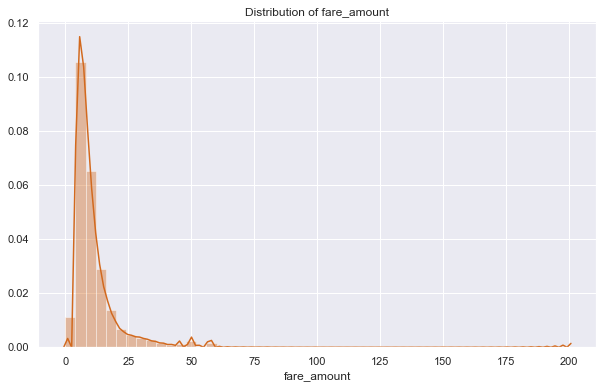

In [342]:
sns.set()
plt.figure(figsize = (10, 6))
sns.distplot(train_file['fare_amount'], color='chocolate')
plt.title('Distribution of fare_amount')

Fare amount distribution shows that most of the rides are under $25. 

### Plot the Distribution of 'passenger_count'

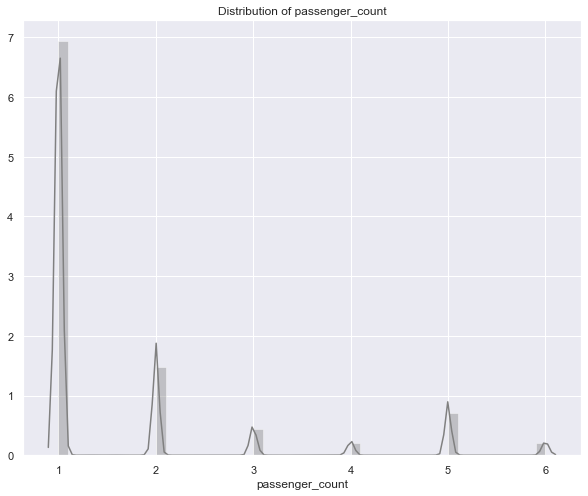

In [343]:
_ = plt.figure(figsize = (10, 8))
_ = sns.distplot(train_file['passenger_count'], color='gray')
_ = plt.title('Distribution of passenger_count')

Distribution of passenger_count shows that most of the rides are single passenger. 

### Plot the Distribution of 'latitude' and 'longitude' 

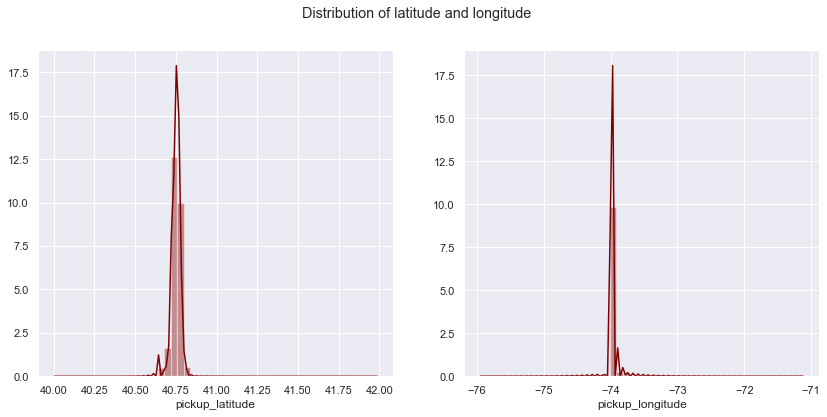

In [344]:
fig = plt.figure(figsize=(14,6))
_ = fig.suptitle("Distribution of latitude and longitude")
ax1 = fig.add_subplot(1,2,1)
_ = sns.distplot(train_file['pickup_latitude'], ax=ax1,color='maroon')
ax2 = fig.add_subplot(1,2,2)
_ = sns.distplot(train_file['pickup_longitude'], ax=ax2, color='maroon')

### Pickup and dropoff visualization

Lets plot the pickup and dropoff locations on the NY map to find any possible correlation between pickup and dropoff.

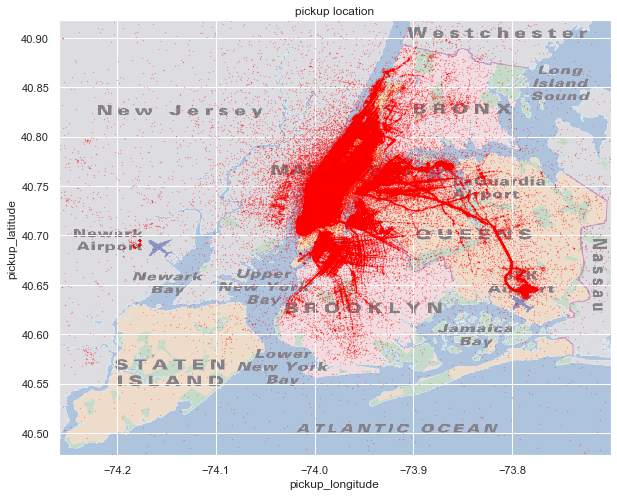

In [345]:
nyc_latitude = (40.477399, 40.917577) 
nyc_longitude = (-74.259090, -73.700272)

nyc_map = mpimg.imread('nyc_map.png')

coordinate_img = train_file.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color= 'red', 
                      s =.05, alpha= .6, figsize=(10,8))

plt.imshow(nyc_map, extent=[nyc_longitude[0], nyc_longitude[1], nyc_latitude[0], nyc_latitude[1]], alpha=0.45)
title= plt.title('pickup location')
x1 = plt.xlim(nyc_longitude)
y1 = plt.ylim(nyc_latitude)
plt.savefig("pickup.png")

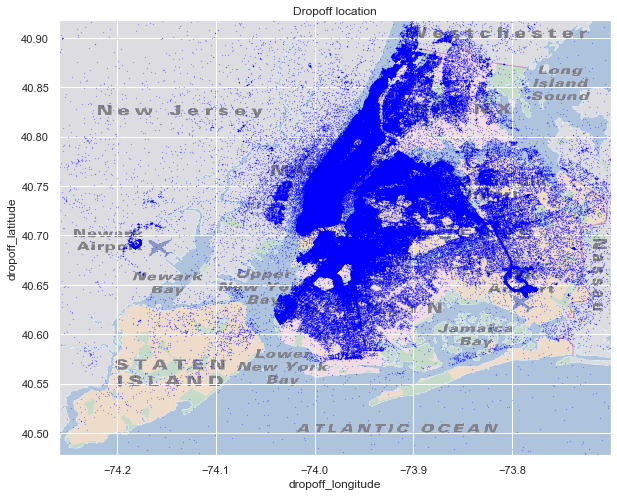

In [346]:
coordinate_img = train_file.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color= 'blue', 
                      s =.05, alpha= .6, figsize=(10,8))

plt.imshow(nyc_map, extent=[nyc_longitude[0], nyc_longitude[1], nyc_latitude[0], nyc_latitude[1]], alpha=0.45)
title= plt.title('Dropoff location')
x1 = plt.xlim(nyc_longitude)
y1 = plt.ylim(nyc_latitude)
plt.savefig("dopoff.png")

In [347]:
#train_file.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='r')    

In [348]:
#train_file.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='b')

As shown in these plots, the concentration of coordinates are related to Manhattan neighborhoods, since this area is considered as the crowded part of NYC.

### Adding Manhattan Trip Features 

In [349]:
manhattan = {
    'min_latitude':40.75,
    'max_latitude':40.79,
    'min_longitude':-73.98,
    'max_longitude':-73.95
}

def manhattan_coordinate(latitude, longitude, location=manhattan):
    if (manhattan['min_latitude'] <= latitude <= manhattan['max_latitude']
       and manhattan['min_longitude'] <= longitude <= manhattan['max_longitude']):
        return 1
    else:
        return 0

train_file['manhattan_pickup'] = train_file.apply(lambda row: manhattan_coordinate(row['pickup_latitude'], row['pickup_longitude'], manhattan)
                                                  , axis = 1)
train_file['manhattan_dropoff'] = train_file.apply(lambda row: manhattan_coordinate(row['dropoff_latitude'], row['dropoff_longitude'], manhattan)
                                                  , axis = 1)

In [350]:
train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17,0,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16,0,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0,0,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4,0,0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7,1,1


### Correlation  among 'passenger_count' and 'fare_amount'

Let's see how number of passenger has impacted fare_amount.

First, plot the average fare_amount by passenger_count.

Text(0.5, 1.0, 'fare_amount per passenger_count')

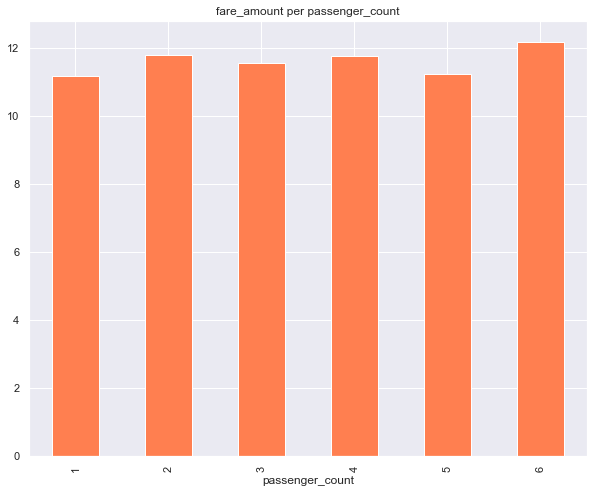

In [351]:
_ = plt.figure(figsize = [10,8])
_ = train_file.groupby('passenger_count')['fare_amount'].mean().plot.bar(color='coral')
plt.title('fare_amount per passenger_count')

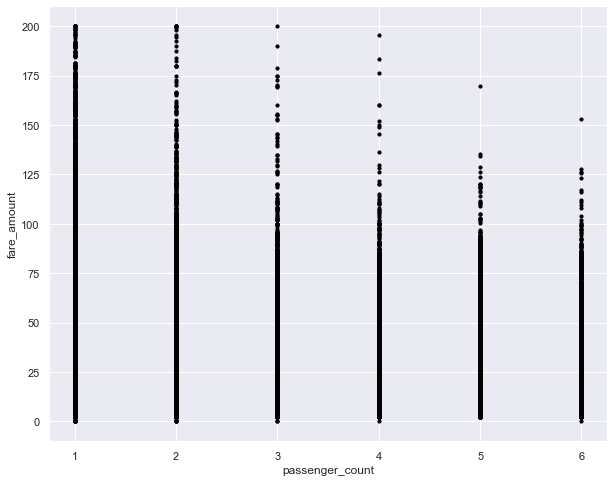

In [352]:
_ = plt.figure(figsize = [10,8])
_ = plt.scatter(x=train_file['passenger_count'], y=train_file['fare_amount'], color='black', s=10)
_ = plt.xlabel('passenger_count')
_ = plt.ylabel('fare_amount')

The above figures for 'fare_amount' based on 'passenger_count' represent that the 'fare_amount' includes a base amount that increases slightly by the number of passengers in this case for single to five passengers. Then, the 'fare_amount' significantly increased for six passengers because another type of car is required.

### Extract New Features

To better explore the data, three new columns should be added to calculate fare_amount normalized based on distance and passenger_count.

In [353]:
train_file['fare_amount/distance'] = train_file.apply(lambda row: row.fare_amount / row.distance, axis = 1)
train_file['fare_amount/passenger_count'] = train_file.apply(lambda row: row.fare_amount / row.passenger_count, axis = 1)
train_file['base_fare'] = train_file.apply(lambda row: row.fare_amount / row.passenger_count / row.distance, axis = 1)

In [354]:
train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff,fare_amount/distance,fare_amount/passenger_count,base_fare
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17,0,0,4.365694,4.50,4.365694
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16,0,1,1.999968,16.90,1.999968
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0,0,0,4.102121,2.85,2.051060
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4,0,0,2.750717,7.70,2.750717
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7,1,1,2.651118,5.30,2.651118


In order to see how days of the week affect the 'fare_amount', other features should be considered constant.
To show how weekdays can affect the 'fare_amount', data corresponding to year 2015 and 1.0 < distance < 3.5 are studied.

In [355]:
#Filter train_file data frame to show the 
filter1_train_file = train_file[(train_file['year'] == 2015) & (train_file['distance'].between(10,30)) & (train_file['passenger_count'].between(2,4))]

In [356]:
filter1_train_file.shape

(5425, 18)

In [357]:
 filter1_train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff,fare_amount/distance,fare_amount/passenger_count,base_fare
2794,35.50,2015-02-22 13:33:34 UTC,-73.790108,40.643593,-73.939629,40.683739,3,13.378322,2015,2,6,22,13,0,0,2.653547,11.833333,0.884516
4128,57.33,2015-03-01 16:58:36 UTC,-73.784126,40.648621,-73.984558,40.757366,2,20.776969,2015,3,6,1,16,0,0,2.759305,28.665000,1.379653
4514,48.04,2015-05-11 08:24:18 UTC,-73.862968,40.768871,-73.984184,40.757637,2,10.285011,2015,5,0,11,8,0,0,4.670875,24.020000,2.335437
4706,37.00,2015-04-23 22:02:57 UTC,-73.942833,40.790199,-73.940781,40.674770,2,12.836276,2015,4,3,23,22,0,0,2.882456,18.500000,1.441228
4880,29.00,2015-02-08 20:35:37 UTC,-74.000076,40.762417,-73.901794,40.836006,2,11.636065,2015,2,6,8,20,0,0,2.492252,14.500000,1.246126


Check if by increasing distance, fare_amount per passenger_count is increased or not.

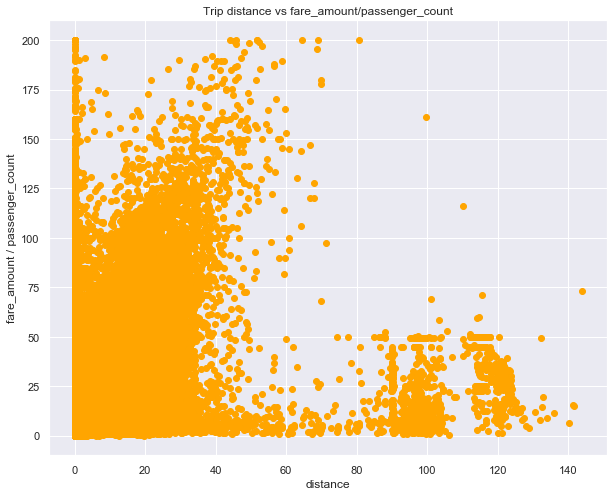

In [409]:
_ = plt.figure(figsize = [10,8])
_ = plt.scatter(x=train_file.distance, y=train_file['fare_amount/passenger_count'], color='orange')
_ = plt.xlabel('distance')
_ = plt.ylabel('fare_amount / passenger_count')
_ = plt.title('Trip distance vs fare_amount/passenger_count')
plt.savefig("trip.png")

The scatter plot denotes that for distance < 70, there is a positive correlation between distance and fare_amount.

In [410]:
#_ = plt.figure(figsize = [10,8])
#_ = plt.scatter(x=train_file.distance, y=train_file['fare_amount'], color='purple')
#_ = plt.xlabel('distance')
#_ = plt.ylabel('fare_amount')
#_ = plt.title('Trip distance vs fare_amount')

Lets plot the fare_amount changes vs. distance over the yars. 

In [418]:
def plotyear(year):
    data = train_file[train_file.year == year]
    colors = data.manhattan_pickup.map({1:'orange', 0:'skyblue'})
    area= 100 * data.passenger_count
    data.plot.scatter('distance','fare_amount', s=area, c=colors, ec='k', figsize=(12,9))
    plt.xlabel('Distance')
    plt.ylabel('fare_amount')
    #plt.legend()

In [419]:
interact(plotyear, year=widgets.IntSlider(min=2009, max=2015, step=1, value=2012))

interactive(children=(IntSlider(value=2012, description='year', max=2015, min=2009), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In order to show the trend of fare_amount changes over the years, scatter plot has been plotted. The size of the circle is based on the number of passengers for  each ride. The orange color is related to the ride with pickup or dropoff in the Manhattan area and the blue color is for other locations.
The figure represents that the fare_amount in Manhattan area is lower than the other location. It is a realistic results since the distance in Manhattan area is less than among other locations also usully number of available taxi is more in this area. Moreover, number of passenger in this area is one or two, Since it is business district that is make sense. As you can see by increasing number of passerngers the fare_amount cost is increased as well.

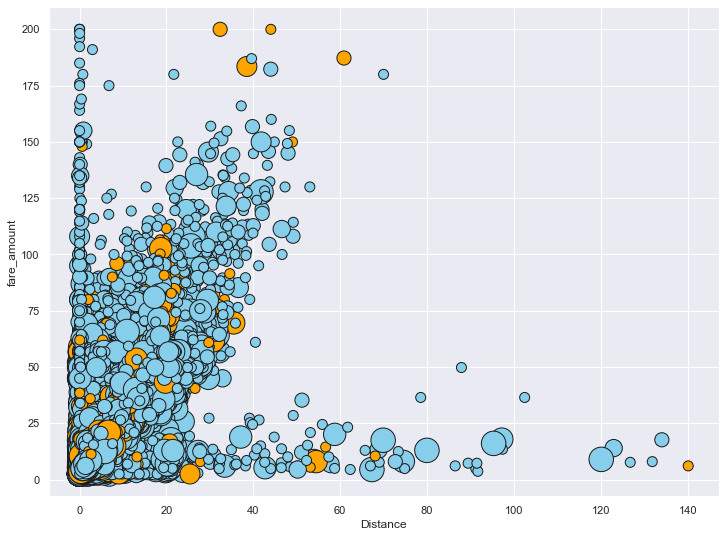

In [420]:
plotyear(2012)
plt.savefig("year2012.png")

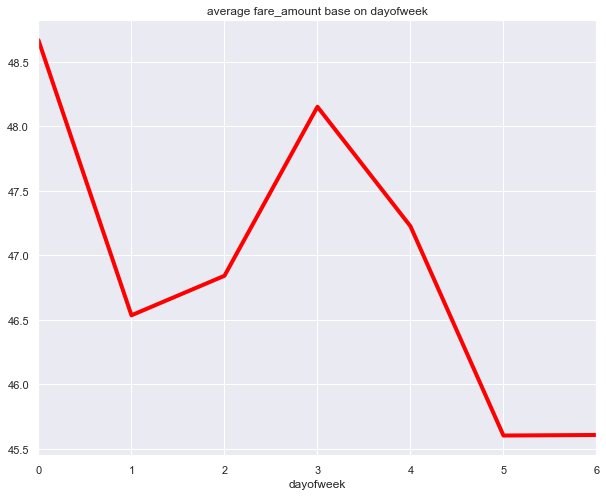

In [360]:
# The day of the week with Monday=0, Sunday=6
_ = plt.figure(figsize = [10,8])
_ = filter1_train_file.groupby('dayofweek')['fare_amount'].mean().plot(color='red',linewidth=4)
_ = plt.title('average fare_amount base on dayofweek')

The results shows that Monday has the highest 'fare_amount'.
Also, 'fare_amount' is lowest during the weekend.

Showing how fare amount per number of passengers is changed over the years can give us a perspective of how it may change in the coming years. Therefore, trend of fare amount per number of passenger is plotted as:

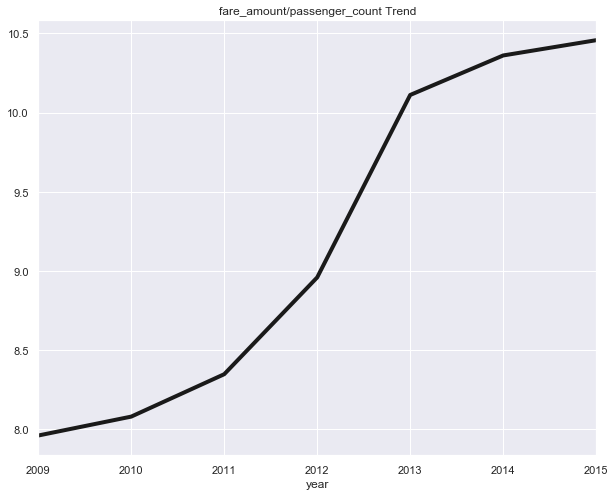

In [361]:
#Show the trend of average 'fare_amount' per person during years
_ = plt.figure(figsize = [10,8])
_ = train_file.groupby('year')['fare_amount/passenger_count'].mean().plot(color='k', linewidth=4)
_ = plt.title('fare_amount/passenger_count Trend')

As expected, the figure show that fare_amount is increased over the years.
However, increas is slowing down since 2013.

The city grows over the years and it may have huge impact on fare amount.
Checking average distance that passengers commute over the years can explain the changes in fare amount. 

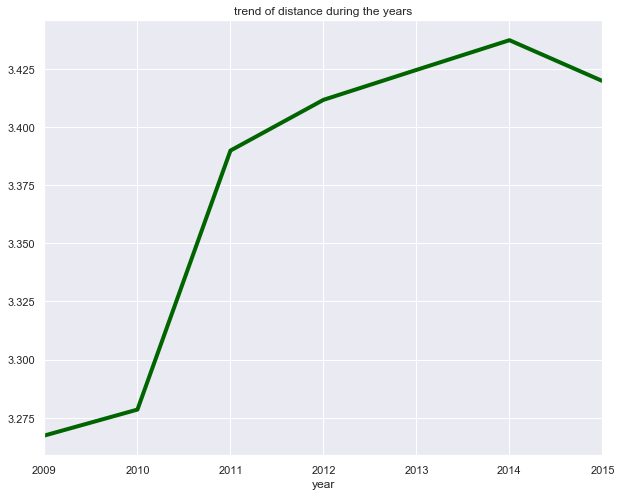

In [362]:
#See trend of distance during the years
_ = plt.figure(figsize = [10,8])
_ = train_file.groupby('year')['distance'].mean().plot(color='darkgreen', linewidth=4)
_ = plt.title('trend of distance during the years')

The distance that passengers commute has increased during the years. It can cause the raise in the fare_amount.
The biggest jump is from 2010 to 2011 but it slightly decreased in 2015.

Let's see how many passengers majority of rides has had:

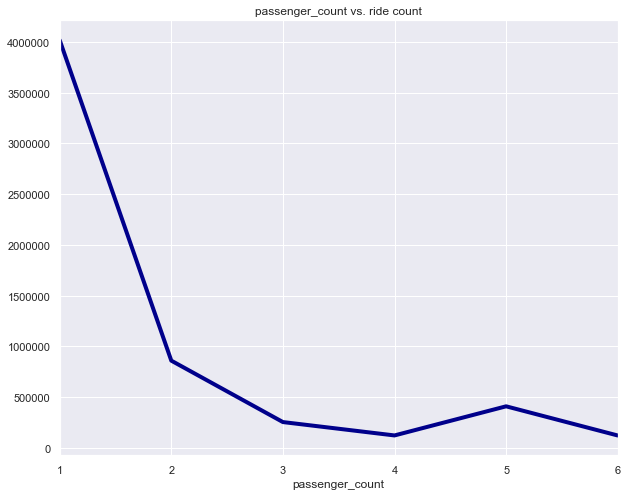

In [363]:
#See passenger_count vs. distance
_ = plt.figure(figsize = [10,8])
_ = train_file.groupby('passenger_count')['distance'].count().plot(color='darkblue', linewidth=4)
_ = plt.title('passenger_count vs. ride count' )

The plot shows that majority of the rides has single passenger. The rides with two passengers is the second most. 

# Part 3: Statistical Methods 

Plot the histogram of fare_amount and calculate the mean and standard deviation. 

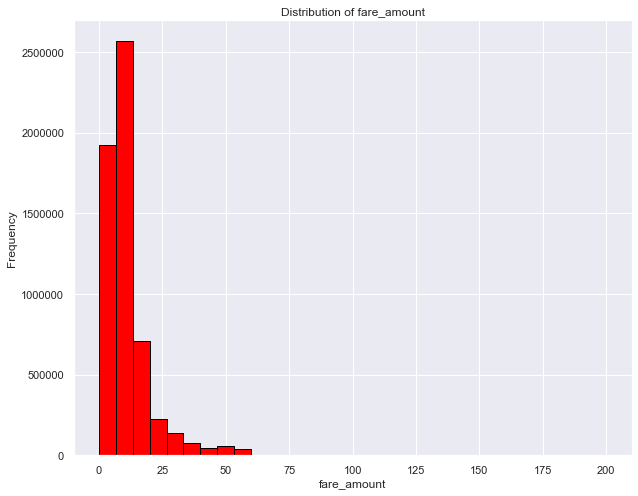

In [364]:
sns.set()
_ = plt.figure(figsize=[10,8])
_ = plt.hist(train_file.fare_amount, bins=30, color='red', ec='black')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of fare_amount')

In [365]:
fare_amount_mean = np.mean(train_file.fare_amount)
fare_amount_mean

11.328666472997604

In [366]:
fare_amount_std = np.std(train_file.fare_amount)
fare_amount_std

9.559991116558372

### Inferential Statistics

In order to show that the given sample is a good representation of the actual distribution, sampling variability test should be performed.

#### Sampling Distribution of Test Statistic

Generate sample for sampling variability test for fare_amount.

In [367]:
def generate_sample(dist, n):
    sample_mean = []
    sample_std = []
    for i in range(n):
        new_sample = norm.rvs(loc=fare_amount_mean, scale=fare_amount_std, size=1000)
        sample_mean.append(np.mean(new_sample))
        sample_std.append(np.std(new_sample))
    return sample_mean, sample_std

In [368]:
new_generated_sample_mean, new_generated_sample_std = generate_sample(train_file.fare_amount, 1000)

Plot the histogram for the mean of generated samples.

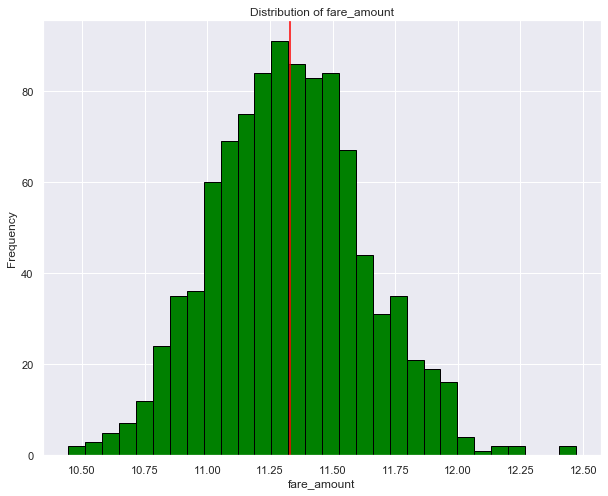

In [369]:
sns.set()
_ = plt.figure(figsize=[10, 8])
_ = plt.hist(new_generated_sample_mean, bins=30, color='green', ec='black')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of fare_amount')
_ = plt.axvline(fare_amount_mean, color='red')

The histogram represents that the denerated_sample_mean is vary close to the mean of the actual data. 

### Generating Bootstrap Replicates

By performing bootstrapping, resampled data is generated to perform statistical inference.

First, performing resampling, by generating bootstrap replicates.

In [370]:
np.random.seed(47)
N_rep = 1000

def bootstrap_replicate_1D(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#draw bootstrap replicates
def draws_bootstrap_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1D(data, func)
    return bs_replicates

Draw bootstrap replicates for train_file.fare_amount.

In [371]:
bootstrap_replicates = draws_bootstrap_reps(train_file.fare_amount, np.mean, N_rep)

Confidence interval is calculated to see if 95% of the observed values would lie within the 95% confidence interval.

In [372]:
conf_int = np.percentile(bootstrap_replicates, [2.5, 97.5])
print('95% confidence interval is: ', conf_int)

95% confidence interval is:  [11.32062227 11.33623392]


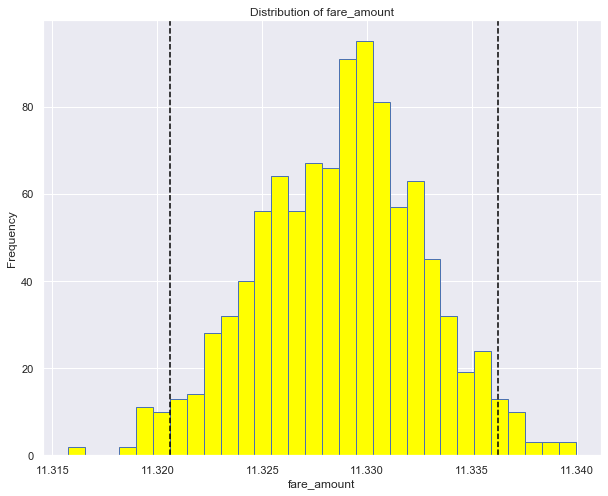

In [373]:
sns.set()
_ = plt.figure(figsize=[10, 8])
_ = plt.hist(bootstrap_replicates, bins=30, color='yellow', ec='b')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of fare_amount')
_ =  plt.axvline(conf_int[0], color='black', linestyle='--')
_ =  plt.axvline(conf_int[1], color='black', linestyle='--')

In [374]:
sample_mean = np.mean(bootstrap_replicates)
print('sample mean is: ', sample_mean)

sample mean is:  11.328744286164522


## Hypothesis Testing

### fare_amount for week days vs. fare_amount for weekends 

The null hypothesis is that the mean of fare_amount for week days and weekends are the same.

In [375]:
weekdays_indx = [0,1,2,3,4]
weekends_indx = [5,6]

weekdays = train_file[train_file['dayofweek'].isin(weekdays_indx)]
weekends = train_file[train_file['dayofweek'].isin(weekends_indx)]

In [376]:
weekdays_fare_amount = weekdays['fare_amount']

In [377]:
weekends_fare_amount = weekends['fare_amount']

In [378]:
diff_mean = np.mean(weekdays_fare_amount) - np.mean(weekends_fare_amount) 

Function to draw bootstrap replicates for difference betweeb mean of weekdays and weekends data sets.

In [379]:
def draws_bootstrap_reps_two(data1, data2, func, size=1):
    bootstrap_replicates = np.empty(size)
    for i in range(size):
        sample1 = bootstrap_replicate_1D(data1, func)
        sample2 = bootstrap_replicate_1D(data2, func)
        bootstrap_replicates[i] = sample1 - sample2
    return bootstrap_replicates

Draw bootstrap replicates for difference betweeb mean of weekdays and weekends.

In [380]:
weekdays_weekends_diff = draws_bootstrap_reps_two(weekdays_fare_amount, weekends_fare_amount, np.mean, N_rep)

Compute the p_value:

In [381]:
p = np.sum(weekdays_weekends_diff >= diff_mean) / len(weekdays_weekends_diff)
p

0.5

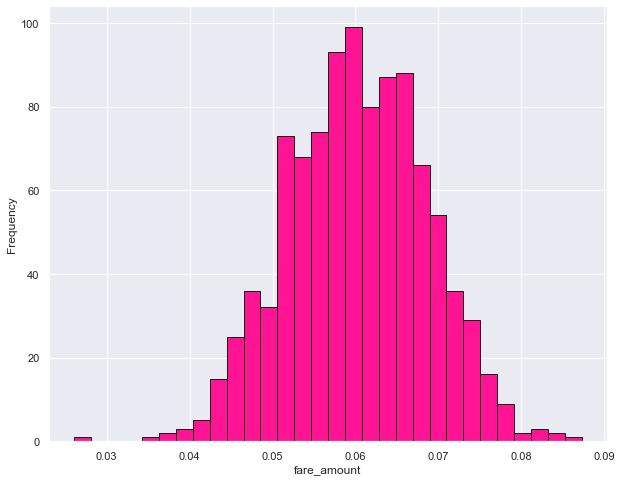

In [382]:
_ = plt.figure(figsize=[10,8])
_ = plt.hist(weekdays_weekends_diff, bins=30, color='deeppink', ec='k')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')

Null hypothesis is that the fare_amount of weekdays and weekends data sets have a same mean.

The test statistic is assumed as: np.mean(weekdays) - np.mean(weekends)

Compute the p-value. The achieved p-value is 0.501. Since the p-value is very low, the hypothesis should be rejected.

In [383]:
np.mean(weekdays_fare_amount)

11.345693104876462

In [384]:
np.mean(weekends_fare_amount)

11.285557665904356

To have a fare comparison, the mean of weekends_fare_amount and weekdays_fare_amount should be shifted. 

In [385]:
weekdays_fare_amount_shifted = weekdays_fare_amount - np.mean(weekdays_fare_amount) + fare_amount_mean
weekends_fare_amount_shifted = weekends_fare_amount - np.mean(weekends_fare_amount) + fare_amount_mean

Draes 10000 bootsrap replicates from shifted arrayas.

In [386]:
weekdays_weekends_shifted_bs = draws_bootstrap_reps_two(weekdays_fare_amount_shifted, weekends_fare_amount_shifted, np.mean, N_rep)

Compute p_value

In [387]:
p = np.sum(weekdays_weekends_shifted_bs >= diff_mean) / len(weekdays_weekends_shifted_bs)
p

0.0

Calculate confidence interval

In [388]:
shifted_conf_int = np.percentile(weekdays_weekends_shifted_bs, [2.5, 97.5])
print('95% confidence interval is: ', shifted_conf_int)

95% confidence interval is:  [-0.01705124  0.01692549]


The p_value of shifted weekdays and weekends arrays is zero that means the null hypothesis should be rejected.

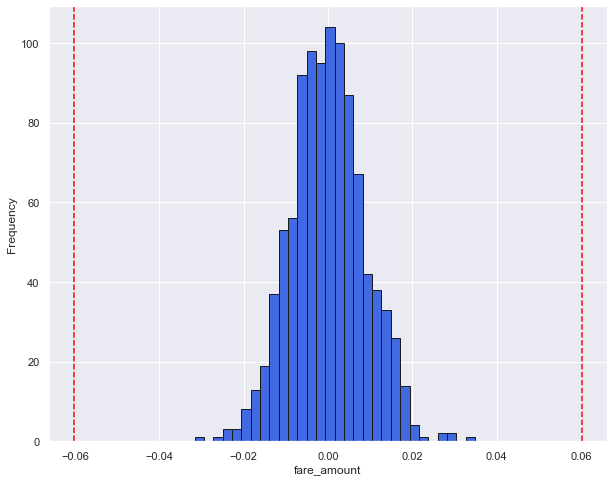

In [389]:
_ = plt.figure(figsize=[10,8])
_ = plt.hist(weekdays_weekends_shifted_bs, bins=30, color='royalblue', ec='k')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')
_ = plt.axvline(diff_mean, color='red', linestyle='--')
_ = plt.axvline(-diff_mean, color='red', linestyle='--')

### fare_amount of Manhattan vs. fare_amount of other locations

The null hypothesis is that the mean of fare_amount of Manhattan is the same as other locations.
Fare_amount for Manhattan includes the fare_amount if manhattan_pickup or manhattan_dropoff is one(which means that pickup or dropoff are in manhattan area).

In [390]:
manhattan_train_file = train_file[(train_file['manhattan_pickup']==1) | (train_file['manhattan_dropoff']==1)]
manhattan_train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff,fare_amount/distance,fare_amount/passenger_count,base_fare
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16,0,1,1.999968,16.9,1.999968
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,1,9,7,1,1,2.651118,5.3,2.651118
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,1,3,6,9,0,1,3.194940,12.1,3.194940
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,1.555807,2012,11,1,20,20,0,1,4.820650,7.5,4.820650
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,4.155444,2012,1,2,4,17,1,0,3.970695,16.5,3.970695


In [391]:
mean_manhattan_fare_amount = np.mean(manhattan_train_file['fare_amount'])
mean_manhattan_fare_amount

10.316964844133715

In [392]:
otherLocation_train_file = train_file[(train_file['manhattan_pickup']==0) | (train_file['manhattan_dropoff']==0)]
otherLocation_train_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff,fare_amount/distance,fare_amount/passenger_count,base_fare
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,0,15,17,0,0,4.365694,4.50,4.365694
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,1,5,16,0,1,1.999968,16.90,1.999968
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,3,18,0,0,0,4.102121,2.85,2.051060
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,5,21,4,0,0,2.750717,7.70,2.750717
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,1,3,6,9,0,1,3.194940,12.10,3.194940


In [393]:
mean_otherLocation_train_file = np.mean(otherLocation_train_file['fare_amount'])
mean_otherLocation_train_file

11.984028682990504

The mean of fare_amount for Manhattan area is lower which makes sense. Probably the reasons is large volume of available taxi in this area.

In [394]:
diff_mean_locations = np.mean(mean_otherLocation_train_file) - np.mean(mean_manhattan_fare_amount) 
diff_mean_locations

1.667063838856789

In [395]:
manhattan_fare_amount = manhattan_train_file['fare_amount']
otherLocation_fare_amount = otherLocation_train_file['fare_amount']

Draw bootstrap replicates for mean of manhattan and other locations.

In [396]:
manhattan_otherLocation_diff = draws_bootstrap_reps_two(manhattan_fare_amount, otherLocation_fare_amount, np.mean, N_rep)

Compute the p_value:

In [397]:
p_value = np.sum(manhattan_otherLocation_diff >= diff_mean_locations / len(manhattan_otherLocation_diff))
p_value

0

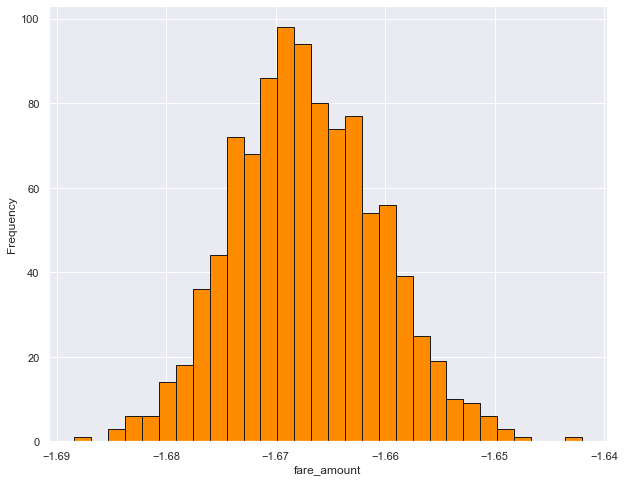

In [398]:
_ = plt.figure(figsize=[10,8])
_ = plt.hist(manhattan_otherLocation_diff, bins=30, color='darkorange', ec='k')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')

To have a fare comparison, the mean of weekends_fare_amount and weekdays_fare_amount should be shifted. 

In [399]:
manhattan_fare_amount_shifted = manhattan_fare_amount - np.mean(manhattan_fare_amount) + fare_amount_mean
otherLocations_fare_amount_shifted = otherLocation_fare_amount - np.mean(otherLocation_fare_amount) + fare_amount_mean

Draes 10000 bootsrap replicates from shifted arrayas.

In [400]:
manhattan_otherLocations_shifted_bs = draws_bootstrap_reps_two(manhattan_fare_amount_shifted, otherLocations_fare_amount_shifted, np.mean, N_rep)

Compute p_value:

In [401]:
p_value = np.sum(manhattan_otherLocations_shifted_bs >= diff_mean_locations) / len(manhattan_otherLocations_shifted_bs)
p_value

0.0

Calculate confidence interval:

In [402]:
shifted_conf_int = np.percentile(manhattan_otherLocations_shifted_bs, [2.5, 97.5])
print('95% confidence interval is: ', shifted_conf_int)

95% confidence interval is:  [-0.01313962  0.012176  ]


The p_value of shifted manhattan and other locations arrays is zero that means the null hypothesis should be rejected.

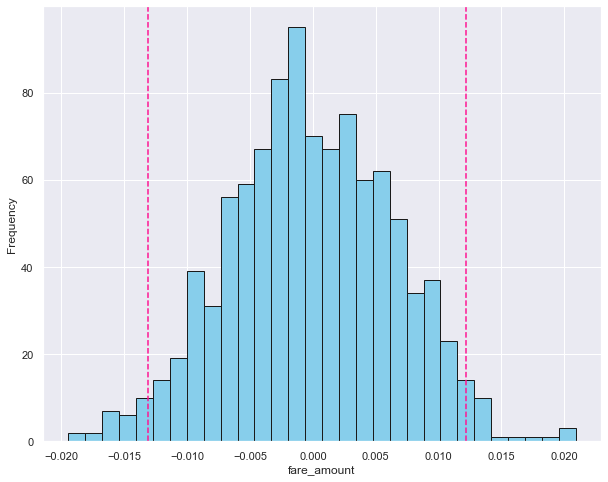

In [403]:
_ = plt.figure(figsize=[10,8])
_ = plt.hist(manhattan_otherLocations_shifted_bs, bins=30, color='skyblue', ec='k')
_ = plt.xlabel('fare_amount')
_ = plt.ylabel('Frequency')
_ = plt.axvline(shifted_conf_int[0], color='deeppink', linestyle='--')
_ = plt.axvline(shifted_conf_int[1], color='deeppink', linestyle='--')